# <p> <center style="background-color:#5c0707;font-family:Palatino Linotype;color:white;font-size:150%;text-align:center;border-radius:0px;padding:10px">  Video games sales regression techniques   </center></p>


# Table of Contents

1. [Introduction](#introduction)  
2. [Data Description](#data-description)  
3. [Data Preprocessing](#data-preprocessing)  
4. [Data Visualizations](#4-visualizations-of-the-data-and-analysis)
5. [Model Training](#5-statistical-models-for-regression)
6. [Model Evaluation](#6-metrics-evaluation)
7. [Conclusion](#7-conclusion)  
8. [References](#8-references)  

# <p> <center style="background-color:#b76e79;font-family:Palatino Linotype;color:white;font-size:150%;text-align:center;border-radius:0px;padding:10px"> 1. Introduction </center></p>

Forecasting video game sales is a useful tool for publishers, developers, and investors in the gaming sector.  
Based on important characteristics including user ratings, critic reviews, and time since release, we can forecast a video game's worldwide sales using machine learning regression algorithms.

This project aims to:
- Examine the effects of various qualities on sales performance.

- Apply and compare multiple regression models (Linear Regression, KNN, Decision Trees).

- Use code documentation and environment control to guarantee reproducibility.

# <p> <center style="background-color:#b76e79;font-family:Palatino Linotype;color:white;font-size:150%;text-align:center;border-radius:0px;padding:10px"> 2. Data Description </center></p>

The dataset used is from [Kaggle](https://www.kaggle.com/code/yonatanrabinovich/video-games-sales-regression-techniques), titled **“Video games sales regression techniques”**.

- **Rows**: 16,719 video games  
- **Columns**: 16 variables, including:
  - `Name`: Game title  
  - `Platform`: Console/platform (e.g., PS4, X360)  
  - `Year_of_Release`: Year the game was released  
  - `Genre`, `Publisher`: Category and publisher of the game  
  - `Critic_Score`, `User_Score`: Aggregated ratings from critics and users  
  - `NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales`: Regional sales in millions  
  - `Global_Sales`: Total worldwide sales (target variable)
  - `Critic_Count`, `User_Count`: number of critics used for critics score and number of users who gave user score
  - `Developer`: Developer of the game
  - `Rating`: The ESRB ratings
  - `Game_Age`: Calculated as `2016 - Year_of_Release` to measure how long a game has been on the market.



### Loading necassary packages 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


import random, os
SEED = 5 # like in the original project
random.seed(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

# <p> <center style="background-color:#b76e79;font-family:Palatino Linotype;color:white;font-size:150%;text-align:center;border-radius:0px;padding:10px"> 3. Data preprocessing  </center></p>

In [2]:
# Load dataset
vgsales = pd.read_csv('Data/Video_Games_Sales_as_at_22_Dec_2016.csv', na_values=["", " ", "NA", "N/A"])

In [3]:
vgsales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Check structure
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [11]:
# Table to count number of NAs 
na_count = vgsales.isna().sum()

na_count = pd.DataFrame(na_count, columns=['na_count'])

na_count


,na_count
Name,2
Platform,0
Year_of_Release,269
Genre,2
Publisher,54
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [13]:
# Drop all NA values as the original project
vgsales = vgsales.dropna()


In [25]:
# Drop all sales except global
vgsales = vgsales.drop(columns=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])


In [27]:
# Recalculate 'Year_of_Release' as game age
vgsales['Game_Age'] = 2016 - vgsales['Year_of_Release']
vgsales = vgsales.drop(columns=['Year_of_Release'])


In [29]:
vgsales.head()

,Name,Platform,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Game_Age
0,Wii Sports,Wii,Sports,Nintendo,82.53,76.0,51.0,8,322.0,Nintendo,E,10.0
2,Mario Kart Wii,Wii,Racing,Nintendo,35.52,82.0,73.0,8.3,709.0,Nintendo,E,8.0
3,Wii Sports Resort,Wii,Sports,Nintendo,32.77,80.0,73.0,8,192.0,Nintendo,E,7.0
6,New Super Mario Bros.,DS,Platform,Nintendo,29.80,89.0,65.0,8.5,431.0,Nintendo,E,10.0
7,Wii Play,Wii,Misc,Nintendo,28.92,58.0,41.0,6.6,129.0,Nintendo,E,10.0


In [37]:
# Summary table
vgsales.describe(include='all')


,Name,Platform,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Game_Age
count,6825,6825,6825,6825,6825.000000,6825.000000,6825.000000,6825,6825.000000,6825,6825,6825.000000
unique,4377,17,12,262,NaN,NaN,NaN,89,NaN,1289,7,NaN
top,Need for Speed: Most Wanted,PS2,Action,Electronic Arts,NaN,NaN,NaN,7.8,NaN,EA Canada,T,NaN
freq,8,1140,1630,944,NaN,NaN,NaN,294,NaN,149,2377,NaN
mean,NaN,NaN,NaN,NaN,0.777590,70.272088,28.931136,NaN,174.722344,NaN,NaN,8.563223
std,NaN,NaN,NaN,NaN,1.963443,13.868572,19.224165,NaN,587.428538,NaN,NaN,4.211248
min,NaN,NaN,NaN,NaN,0.010000,13.000000,3.000000,NaN,4.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.110000,62.000000,14.000000,NaN,11.000000,NaN,NaN,5.000000
50%,NaN,NaN,NaN,NaN,0.290000,72.000000,25.000000,NaN,27.000000,NaN,NaN,9.000000
75%,NaN,NaN,NaN,NaN,0.750000,80.000000,39.000000,NaN,89.000000,NaN,NaN,12.000000


In [41]:
vgsales.to_csv('Data/vgsales_cleaned.csv')

# <p> <center style="background-color:#b76e79;font-family:Palatino Linotype;color:white;font-size:150%;text-align:center;border-radius:0px;padding:10px"> 4. Visualizations of the data and analysis  </center></p>


Below we will go through visualisations based on the already cleaned dataset - without the need to run the whole data cleaning part again. 

In [83]:
# Load clean dataset
df = pd.read_csv('Data/vgsales_cleaned.csv')

In [84]:
df.head()

,Unnamed: 0,Name,Platform,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Game_Age
0,0,Wii Sports,Wii,Sports,Nintendo,82.53,76.0,51.0,8.0,322.0,Nintendo,E,10.0
1,2,Mario Kart Wii,Wii,Racing,Nintendo,35.52,82.0,73.0,8.3,709.0,Nintendo,E,8.0
2,3,Wii Sports Resort,Wii,Sports,Nintendo,32.77,80.0,73.0,8.0,192.0,Nintendo,E,7.0
3,6,New Super Mario Bros.,DS,Platform,Nintendo,29.80,89.0,65.0,8.5,431.0,Nintendo,E,10.0
4,7,Wii Play,Wii,Misc,Nintendo,28.92,58.0,41.0,6.6,129.0,Nintendo,E,10.0


## Univariate plots

In [85]:
# Function to control figure size - not nessesary but used for visual similarity
def fig(width, height):
    plt.figure(figsize=(width, height))

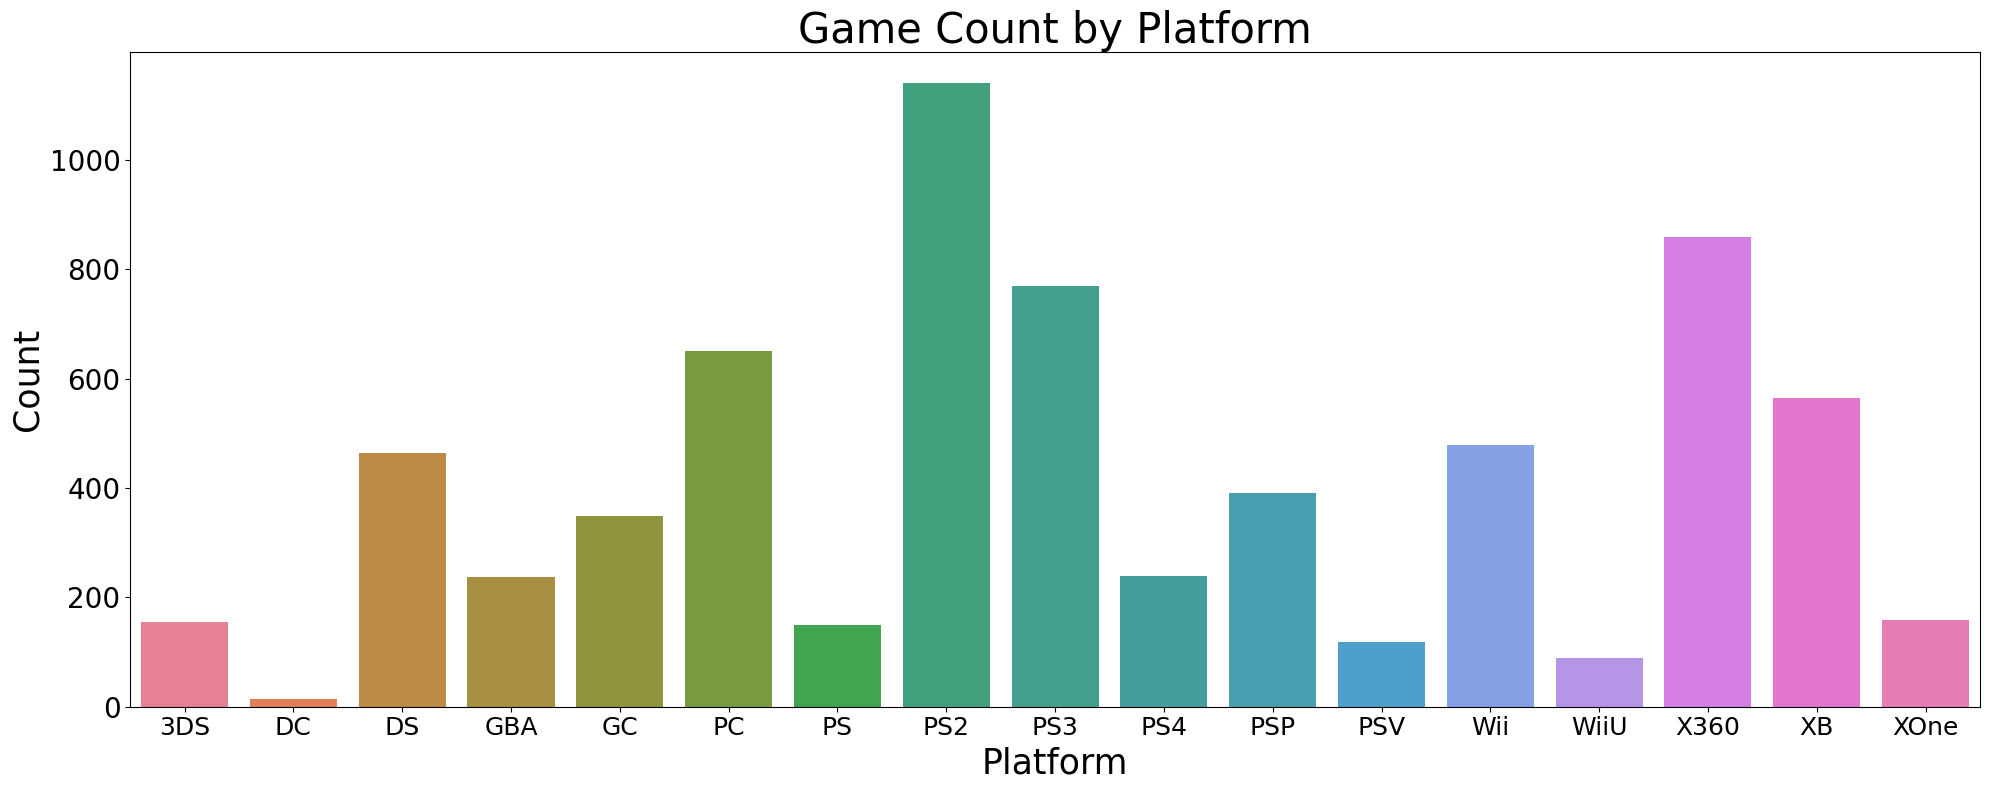

In [86]:
fig(20, 8)

# for easier visual comparison to original
platform_order = ['3DS', 'DC', 'DS', 'GBA', 'GC', 'PC', 'PS', 'PS2', 'PS3',
                  'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']

df['Platform'] = pd.Categorical(df['Platform'], categories=platform_order, ordered=True)

palette = sns.color_palette('husl', n_colors=len(platform_order))
Platform_bar = sns.countplot(data=df, x='Platform', order=platform_order, palette=palette)
Platform_bar.set_title("Game Count by Platform", fontsize=30)
Platform_bar.set_xlabel("Platform", fontsize=25)
Platform_bar.set_ylabel("Count", fontsize=25)
Platform_bar.tick_params(axis='x', labelsize=18)
Platform_bar.tick_params(axis='y', labelsize=20)

plt.tight_layout()
plt.show()



The chart is identical to it's original showing for PS2 and X360 highest game count. 

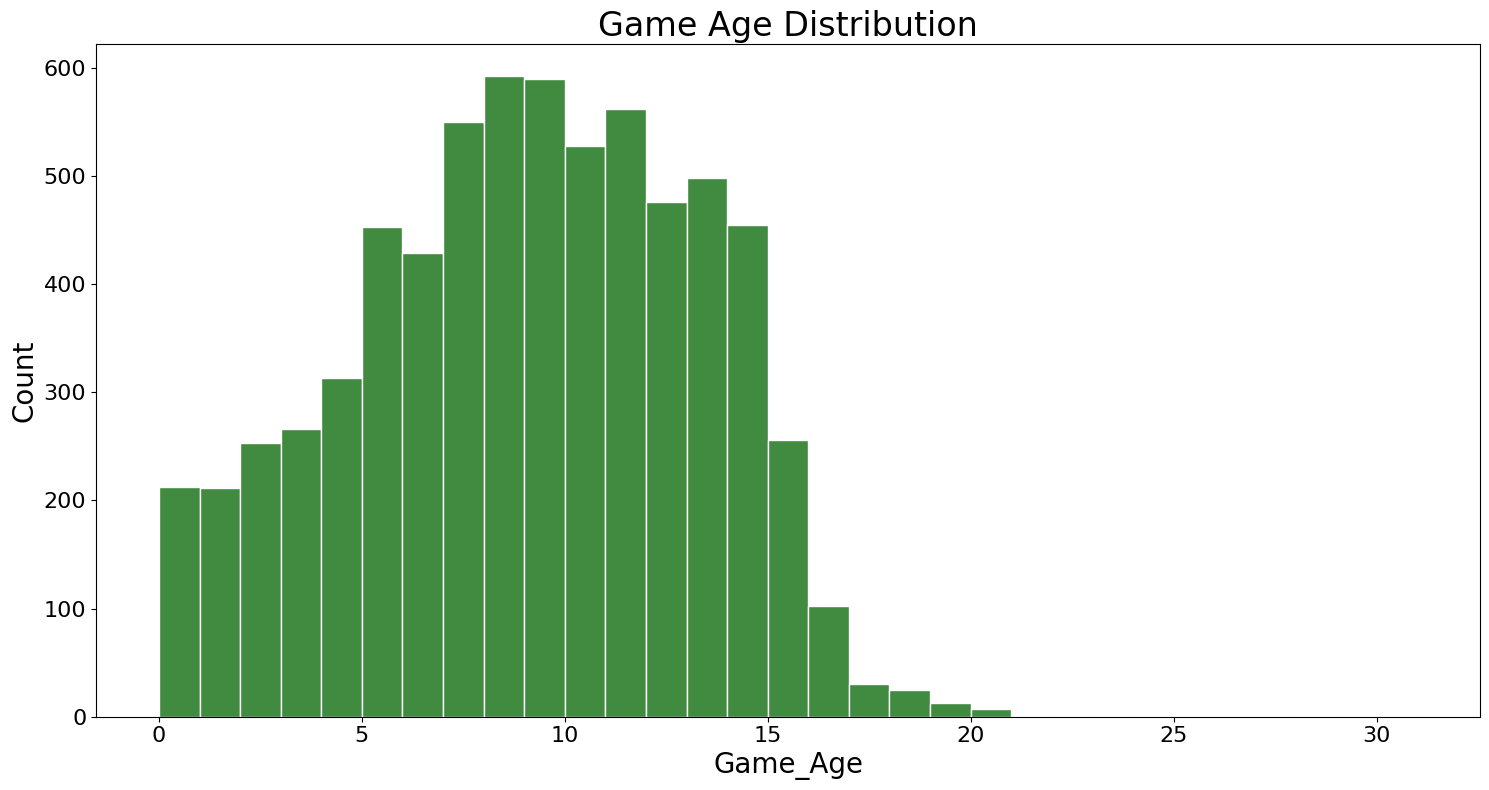

In [69]:
fig(15, 8)

sns.histplot(
    df['Game_Age'],
    binwidth=1,
    color='darkgreen',
    edgecolor='white'
)

plt.xlabel('Game_Age', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Game Age Distribution', fontsize=24)
plt.tight_layout()
plt.show()

The chart again is very similar to the original, we do not see the sparse values above 20 - because of the small count - but they exist. 

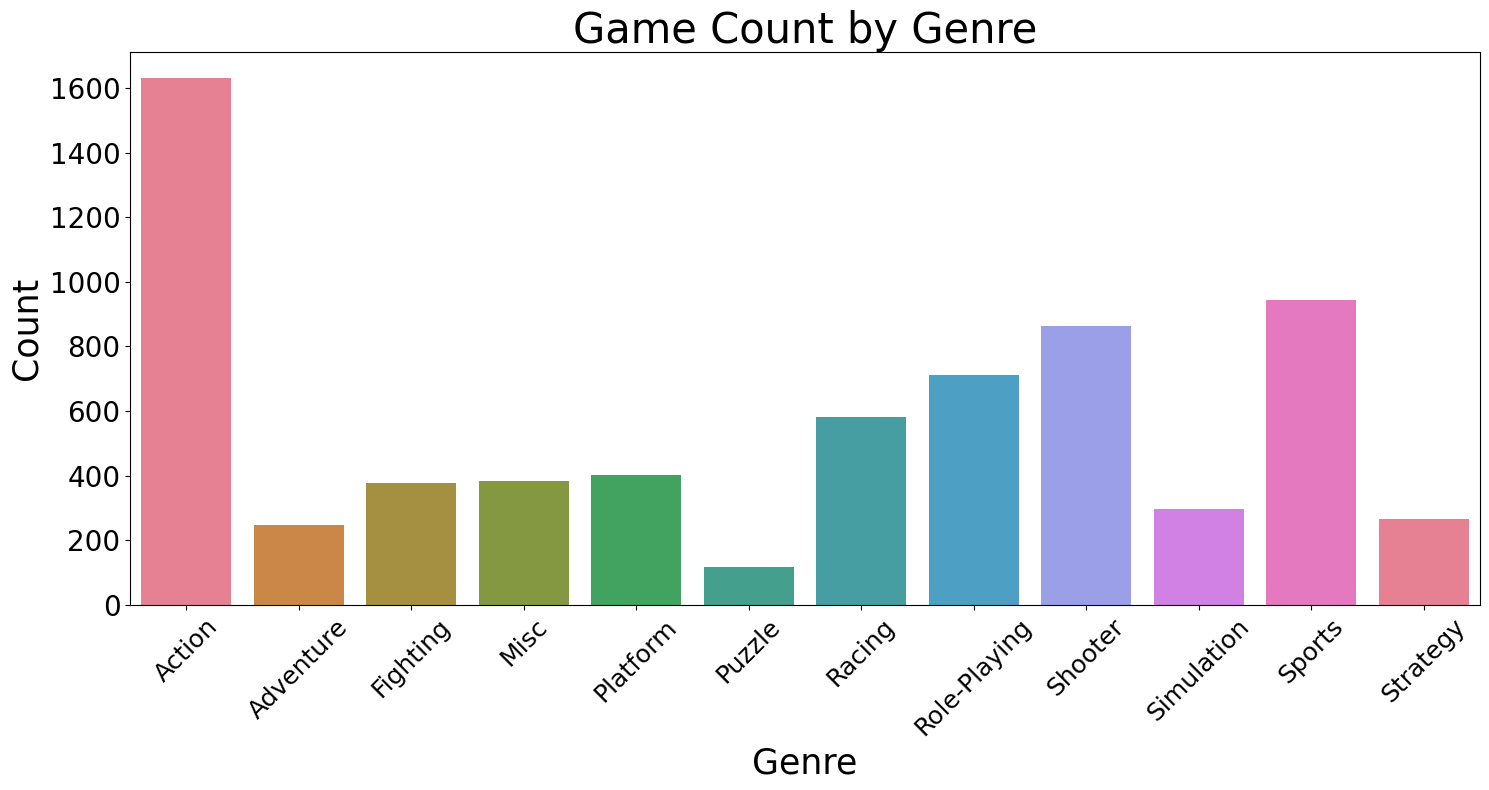

In [40]:
fig(15, 8)

# for easier visual comparison to original
genre_order = ['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing',"Role-Playing",'Shooter','Simulation','Sports','Strategy']

df['Genre'] = pd.Categorical(df['Genre'], categories=genre_order, ordered=True)

palette = sns.color_palette('husl', n_colors=len('genre_order'))
Platform_bar = sns.countplot(data=df, x='Genre', palette=palette)
Platform_bar.set_title("Game Count by Genre", fontsize=30)
Platform_bar.set_xlabel("Genre", fontsize=25)
Platform_bar.set_ylabel("Count", fontsize=25)
Platform_bar.tick_params(axis='x', labelsize=18, rotation=45)
Platform_bar.tick_params(axis='y', labelsize=20)

plt.tight_layout()
plt.show()


This plot shows the most popular genres are Action, Shooter and Sports. 

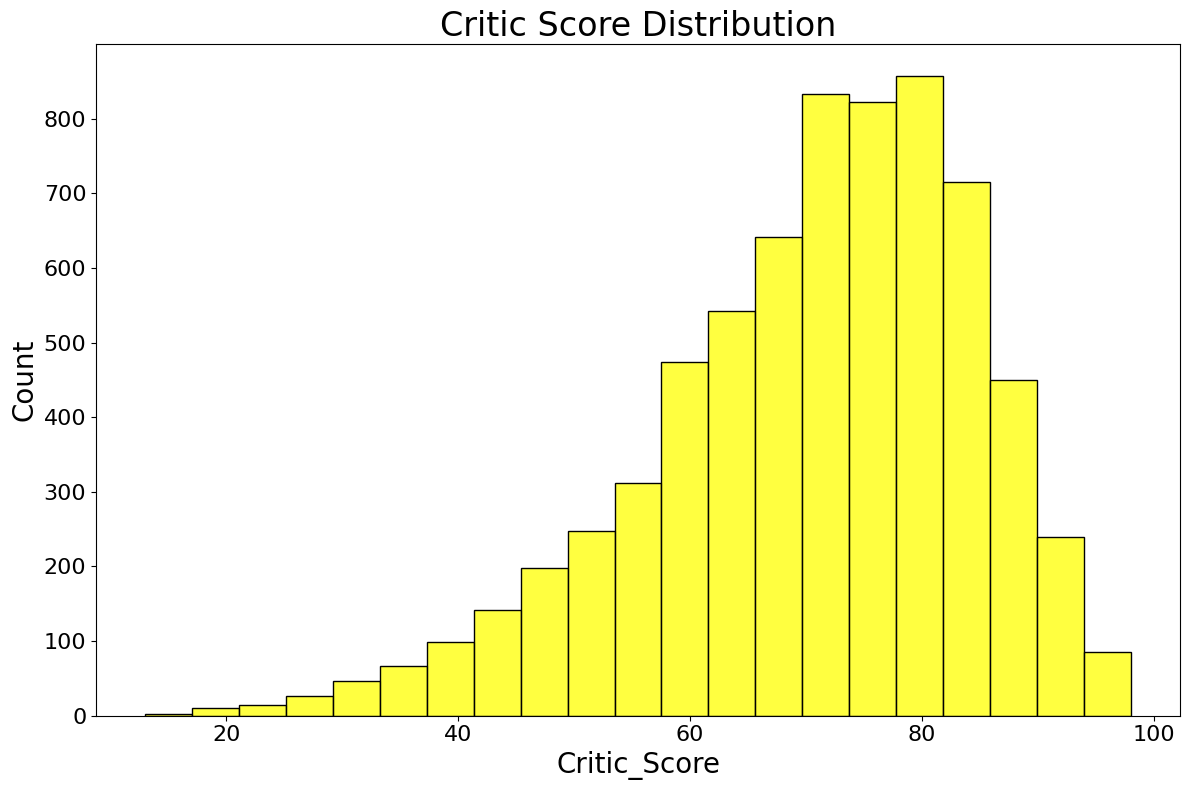

In [65]:
fig(12, 8)

sns.histplot(
    df['Critic_Score'],
    binwidth=4,
    color='yellow',
    edgecolor='black'
)

plt.xlabel('Critic_Score', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Critic Score Distribution', fontsize=24)
plt.tight_layout()
plt.show()

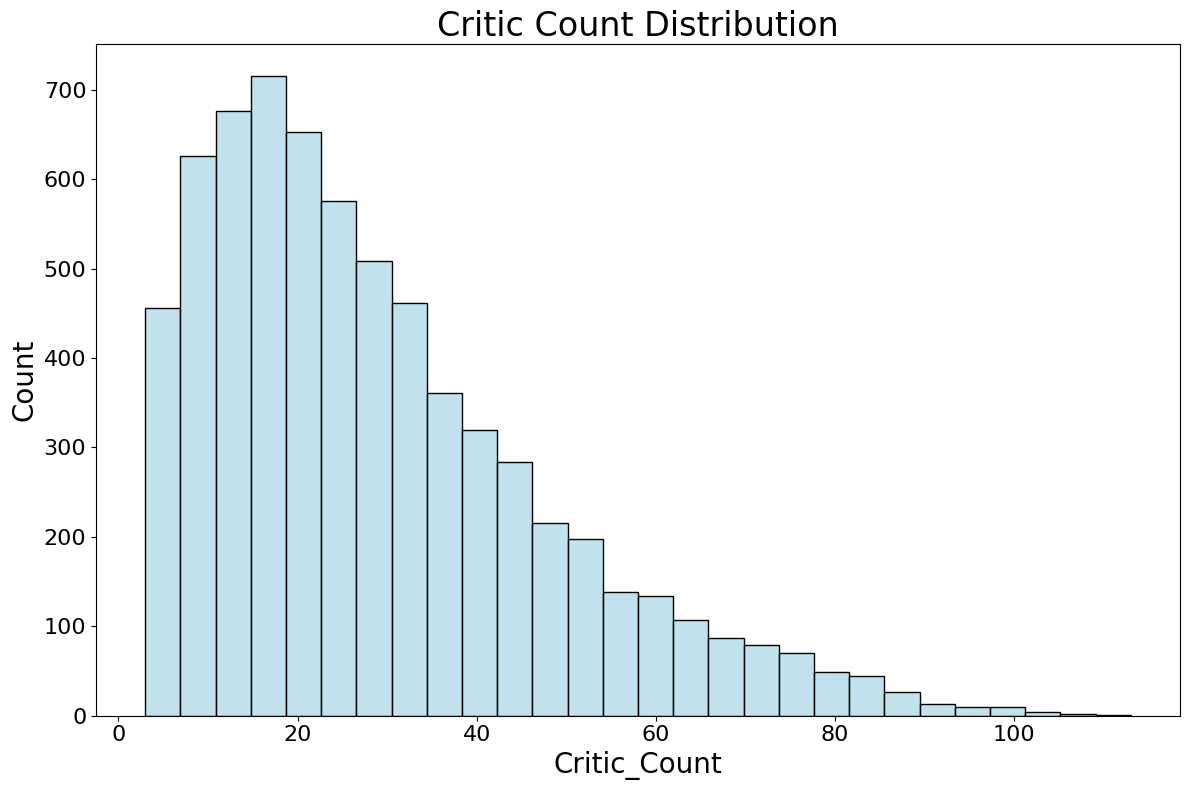

In [66]:
fig(12, 8)

sns.histplot(
    df['Critic_Count'],
    binwidth=4,
    color='lightblue',
    edgecolor='black'
)

plt.xlabel('Critic_Count', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Critic Count Distribution', fontsize=24)
plt.tight_layout()
plt.show()

In [117]:
top10_df = df[['Name', 'User_Score']].sort_values(by='Name')
top10_df = top10_df.sort_values(by='Name').sort_values(by='User_Score', ascending=False).head(20)

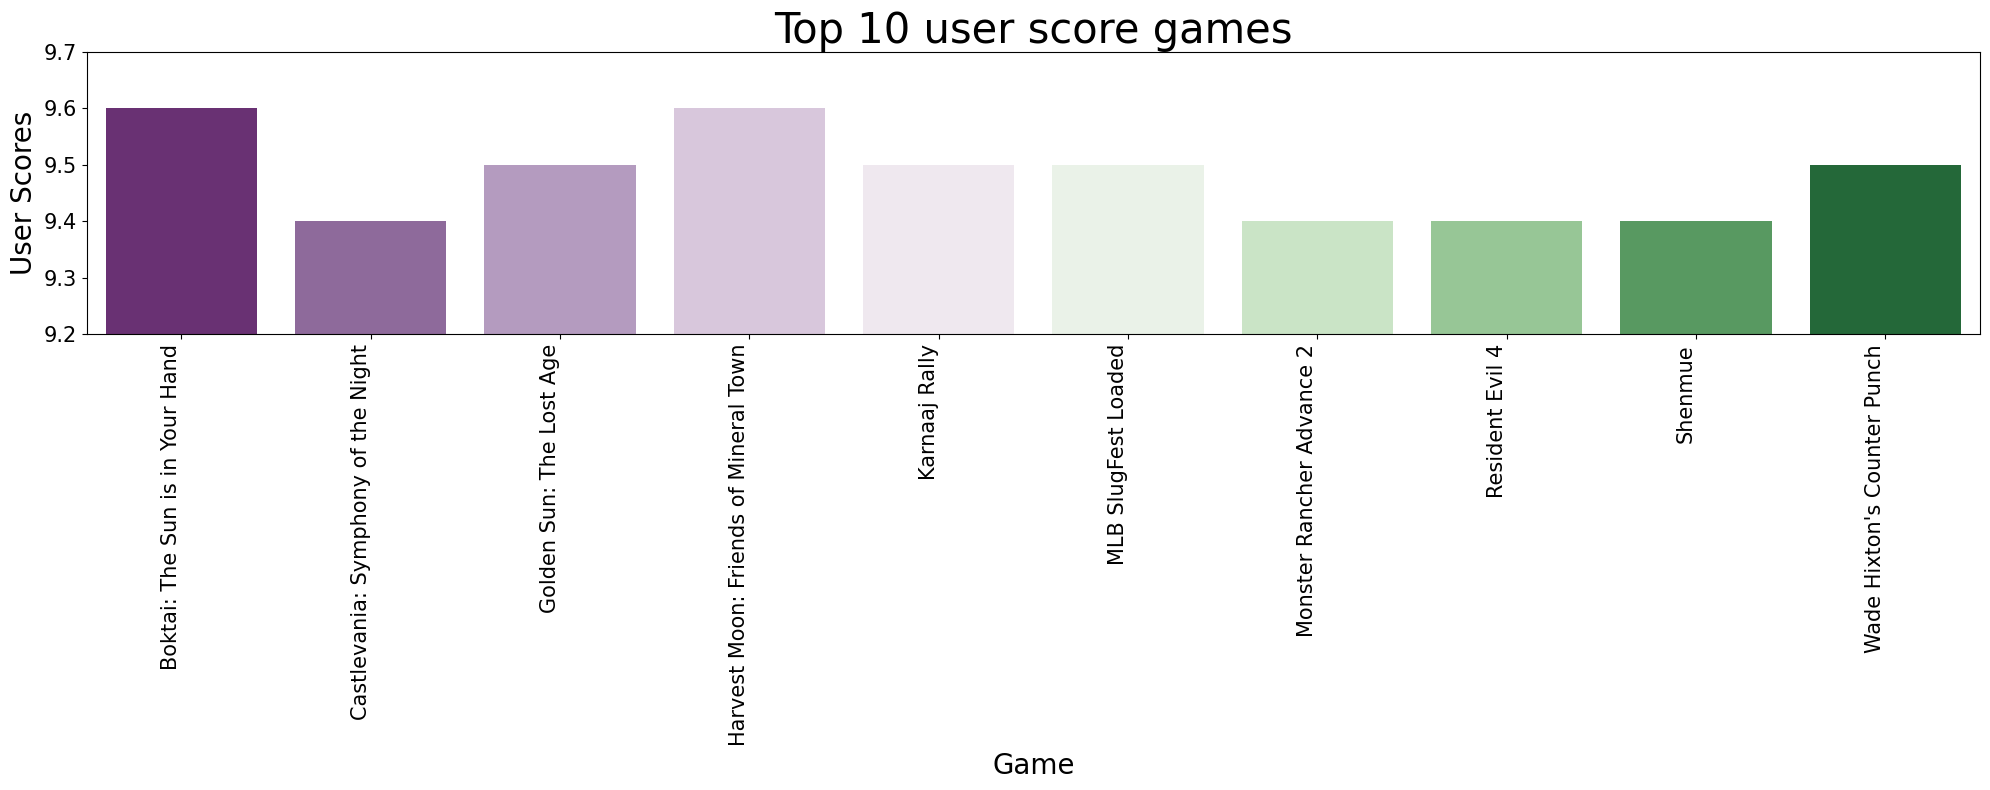

In [119]:
top10_df = df[['Name', 'User_Score']].sort_values(by='Name') # First i needed to sort by alphabetical order, 
#because there are multiple titles with same score and R chart took them alphabetically. 
top10_df = top10_df.sort_values(by='Name').sort_values(by='User_Score', ascending=False).head(10)
top10_df = top10_df.sort_values(by='Name')  # <- Alphabetical order in plot
top10_df['Name'] = pd.Categorical(top10_df['Name'], categories=top10_df['Name'], ordered=True)
plt.figure(figsize=(20, 8))

sns.barplot(data=top10_df, x='Name', y='User_Score', palette='PRGn')

plt.ylim(9.2, 9.7) 

plt.title("Top 10 user score games", fontsize=30)
plt.xlabel("Game", fontsize=20)
plt.ylabel("User Scores", fontsize=20)
plt.xticks(rotation=90, fontsize=15, ha='right')
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()


This plot differs slightly from original because of multiple games (11) ranking at the 3 place with score of 9.4

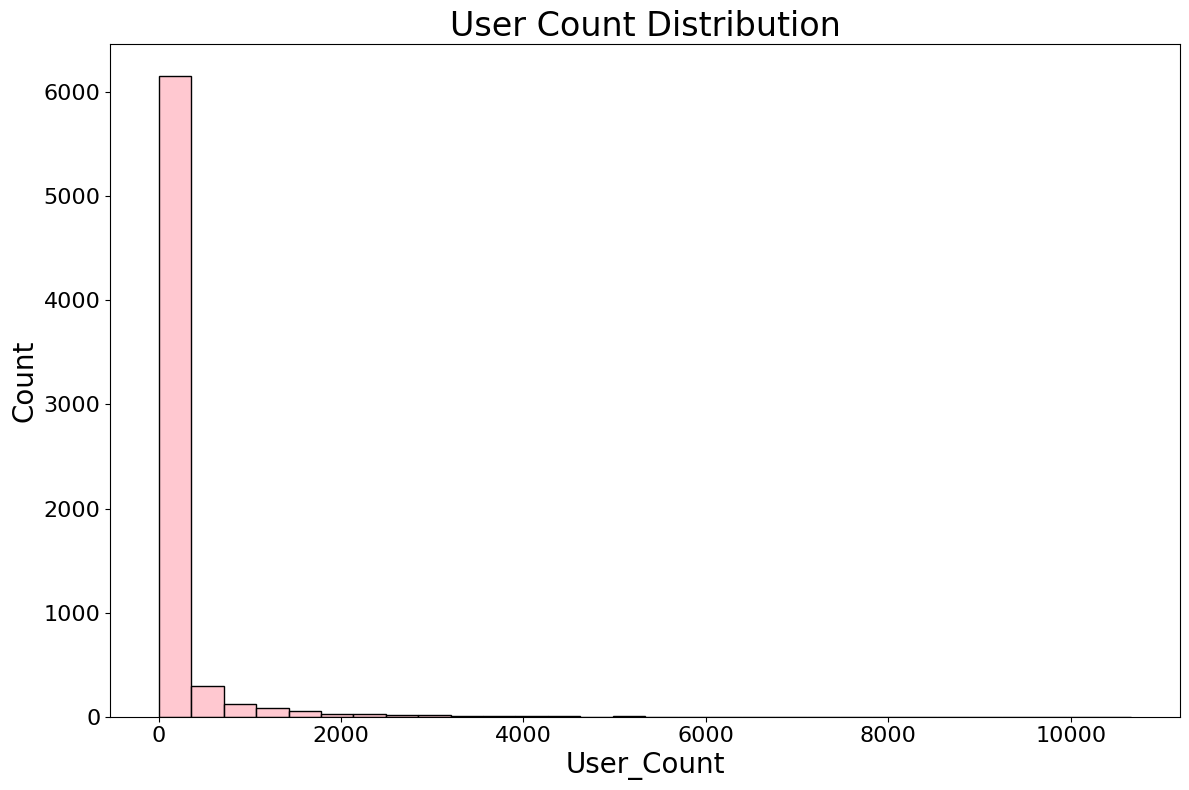

In [121]:
fig(12, 8)

sns.histplot(
    df['User_Count'],
    bins=30,
    color='lightpink',
    edgecolor='black'
)

plt.xlabel('User_Count', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('User Count Distribution', fontsize=24)
plt.tight_layout()
plt.show()

In [123]:
summary = df['User_Count'].describe()
print(f'''
Min.   : {summary["min"]}
1st Qu.: {summary["25%"]}
Median : {summary["50%"]}
Mean   : {summary["mean"]:.1f}
3rd Qu.: {summary["75%"]}
Max.   : {summary["max"]}
''')


Min.   : 4.0
1st Qu.: 11.0
Median : 27.0
Mean   : 174.7
3rd Qu.: 89.0
Max.   : 10665.0



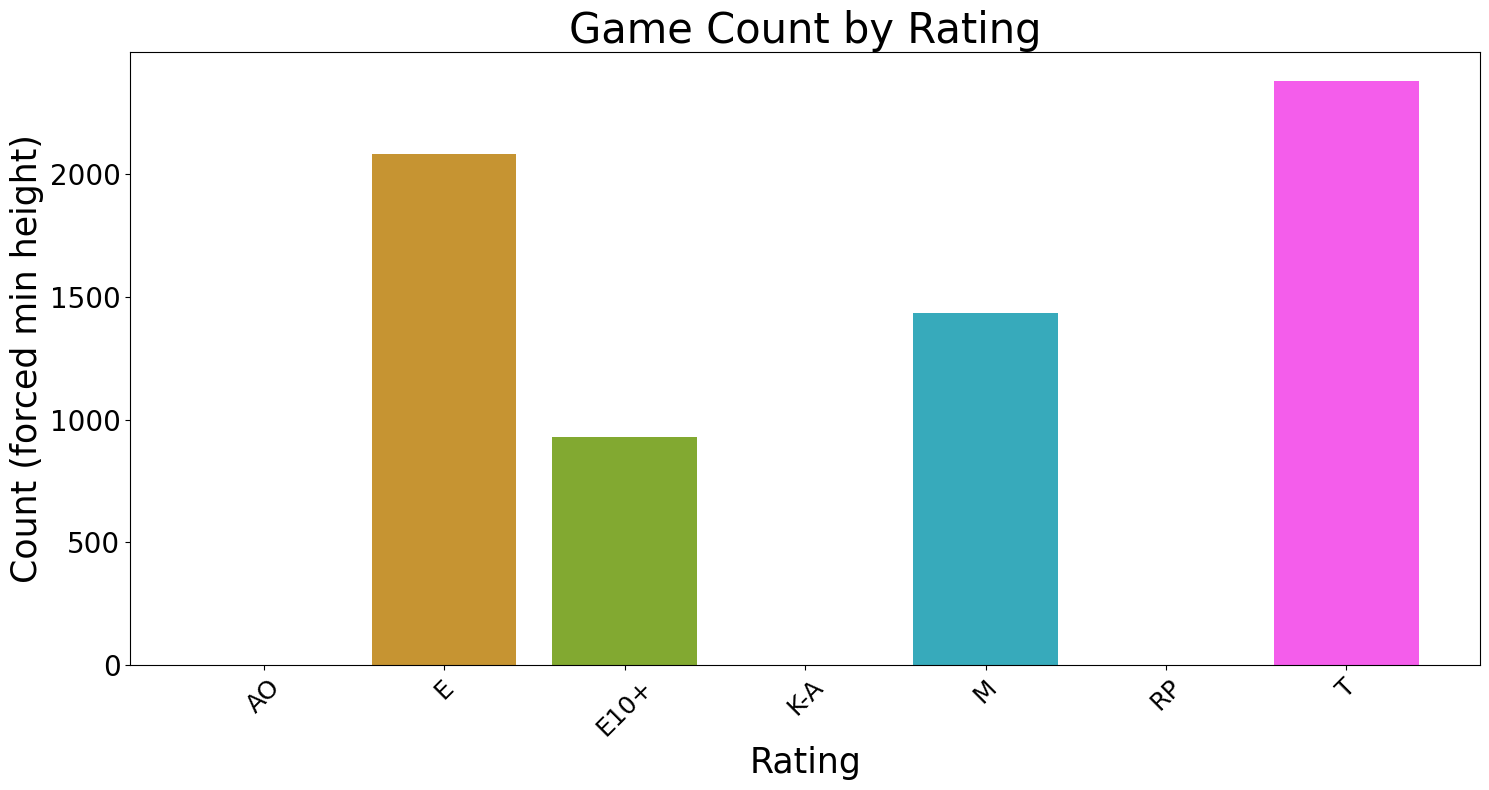

In [ ]:
rating_order = ['AO', 'E', 'E10+', 'K-A', 'M', 'RP', 'T']
df['Rating'] = pd.Categorical(df['Rating'], categories=rating_order, ordered=True)
rating_counts = df['Rating'].value_counts().reindex(rating_order, fill_value=0)
rating_counts += 1
plt.figure(figsize=(15, 8))
bars = plt.bar(rating_counts.index, rating_counts.values, color=sns.color_palette('husl', len(rating_order)))

plt.title("Game Count by Rating", fontsize=30)
plt.xlabel("Rating", fontsize=25)
plt.ylabel("Count (forced min height)", fontsize=25)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.show()


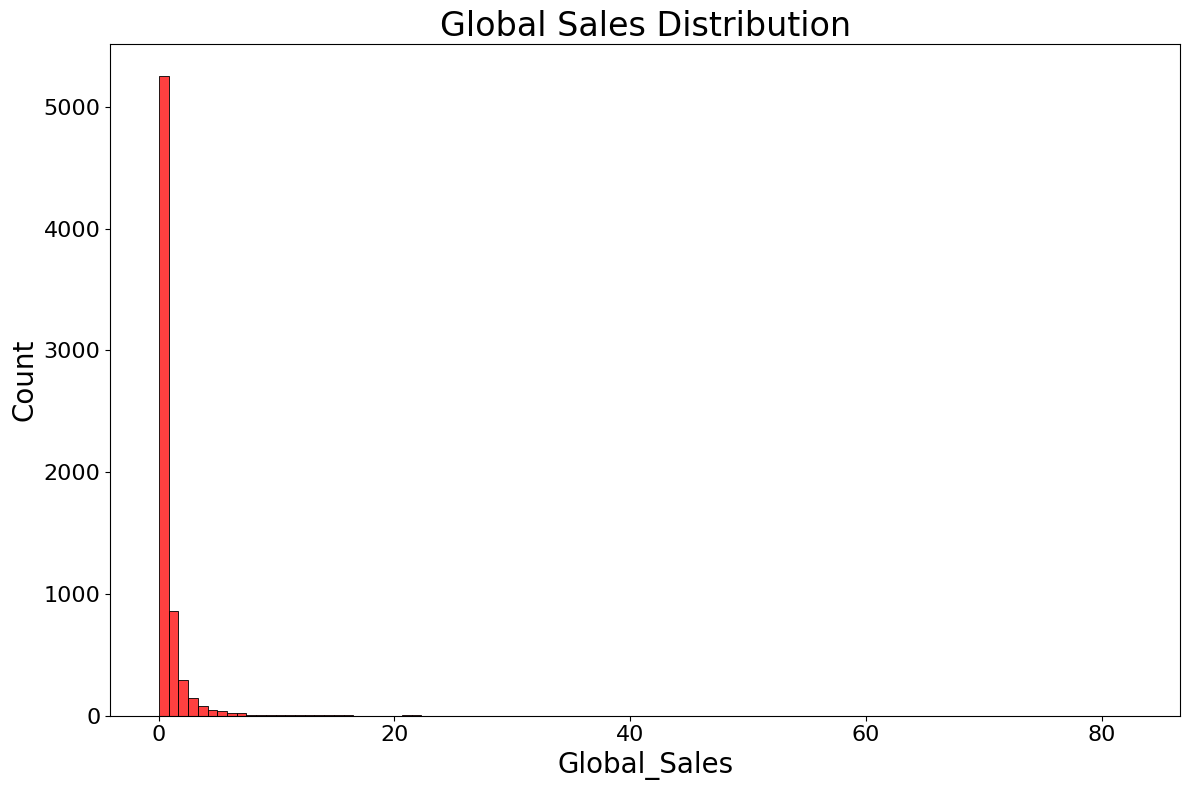

In [149]:
fig(12, 8)

sns.histplot(
    df['Global_Sales'],
    bins=100,
    color='red',
    edgecolor='black'
)

plt.xlabel('Global_Sales', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Global Sales Distribution', fontsize=24)
plt.tight_layout()
plt.show()

In [152]:
summary = df['Global_Sales'].describe()
print(f'''
Min.   : {summary["min"]}
1st Qu.: {summary["25%"]}
Median : {summary["50%"]}
Mean   : {summary["mean"]:.4f}
3rd Qu.: {summary["75%"]}
Max.   : {summary["max"]}
''')


Min.   : 0.01
1st Qu.: 0.11
Median : 0.29
Mean   : 0.7776
3rd Qu.: 0.75
Max.   : 82.53



## Multivariate plots

# <p> <center style="background-color:#b76e79;font-family:Palatino Linotype;color:white;font-size:150%;text-align:center;border-radius:0px;padding:10px"> 5. Statistical Models For Regression  </center></p>

## KNN Regressor

## Linear Regression


## Decision Tree


# <p> <center style="background-color:#b76e79;font-family:Palatino Linotype;color:white;font-size:150%;text-align:center;border-radius:0px;padding:10px"> 6. Metrics Evaluation   </center></p>

# <p> <center style="background-color:#b76e79;font-family:Palatino Linotype;color:white;font-size:150%;text-align:center;border-radius:0px;padding:10px"> 7. Conclusion  </center></p>

# <p> <center style="background-color:#b76e79;font-family:Palatino Linotype;color:white;font-size:150%;text-align:center;border-radius:0px;padding:10px"> 8. References  </center></p>
